## Problemset 6

### Kristopher Nichols 2/26/2018

In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from pylab import rcParams
import seaborn as sb
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


# import data
biden = pd.read_csv('biden.csv')
biden.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


#### 1A)

In [31]:
y = biden['biden'].values
X = biden[['female', 'age', 'educ', 'dem', 'rep']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)

MSE= 406.672049146


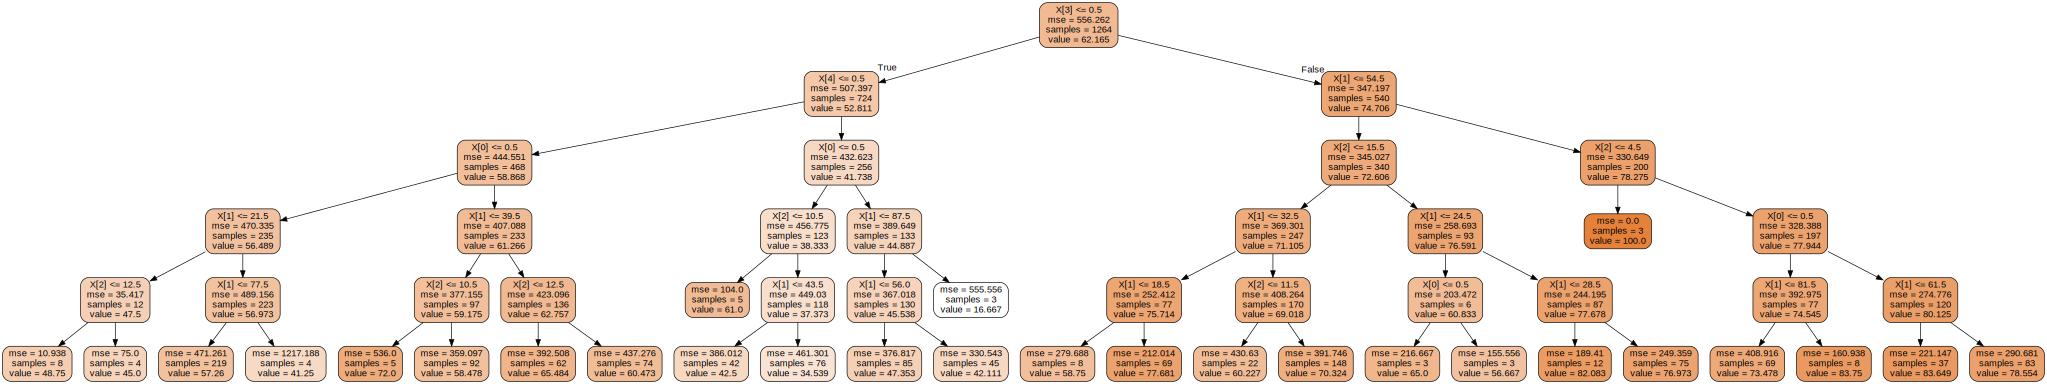

In [32]:
Tree_1A = export_graphviz(
    tree,
    out_file=None,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(Tree_1A)
graph.render('Tree_1A')
graph

###### The first split is whether the person is democratic or not a dem (true or false). On average, the democrats like Biden more than non-Democrats. The  next split occurs by parsing apart the non-Democrats (the Republicans) which like Biden far less. The enxt split for both parties is by sex (female and not female). Both parties indicate that females like Biden more than males. There is then a cut by age. The group which seem to prefer Biden the most are the young female Democrats.

#### 1B)

In [33]:
tree2 = DecisionTreeRegressor(min_samples_leaf=5, max_depth=3)
tree2.fit(X_train, y_train)
see_the_tree2 = export_graphviz(
    tree2,
    out_file=None,
    rounded=True,
    filled=True,
)
for d in range(1,18):
    tree2 = DecisionTreeRegressor(min_samples_leaf=5, max_depth=d)
    tree2.fit(X_train, y_train)
    y_pred2 = tree2.predict(X_test)
    MSE2 = mean_squared_error(y_test, y_pred2)
    print('with Max depth = {}; MSE ={}'.format(d, MSE2))

with Max depth = 1; MSE =420.0224529349668
with Max depth = 2; MSE =400.06539818418173
with Max depth = 3; MSE =396.1937146321307
with Max depth = 4; MSE =404.59602362340974
with Max depth = 5; MSE =411.80592737244535
with Max depth = 6; MSE =420.7201303515671
with Max depth = 7; MSE =437.8869249136812
with Max depth = 8; MSE =465.0669714073918
with Max depth = 9; MSE =462.1936150905454
with Max depth = 10; MSE =470.42433889259746
with Max depth = 11; MSE =473.1109721765993
with Max depth = 12; MSE =480.7842360442156
with Max depth = 13; MSE =476.9869662046227
with Max depth = 14; MSE =480.08124128311744
with Max depth = 15; MSE =481.7028660878889
with Max depth = 16; MSE =482.66854241366775
with Max depth = 17; MSE =480.87183478033825


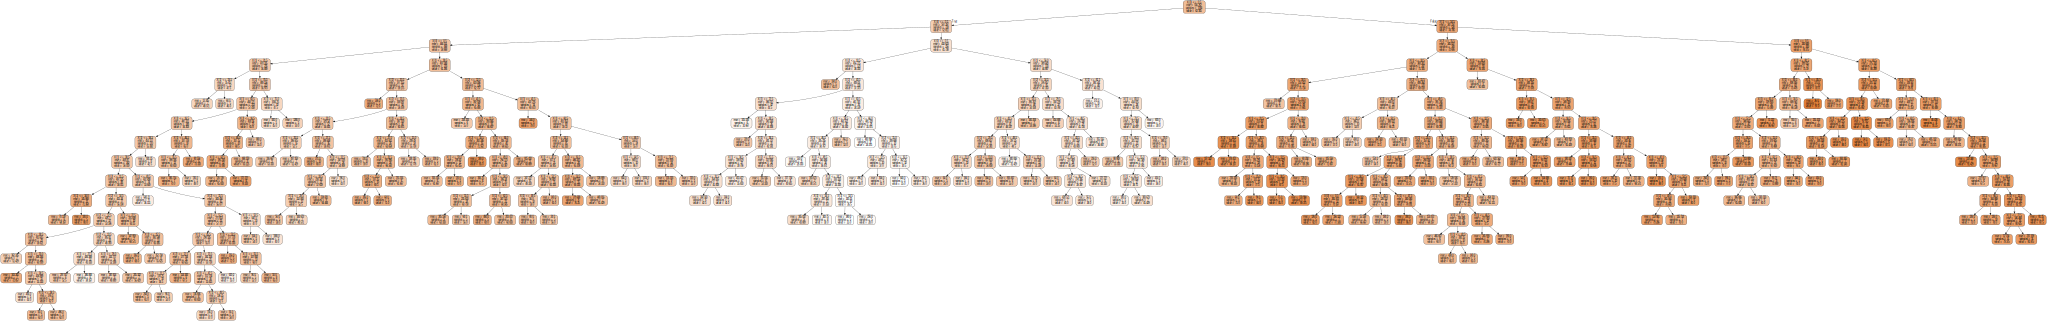

In [34]:
biden_tree2 = export_graphviz(tree2, out_file=None, rounded=True, filled=True)
graph = graphviz.Source(biden_tree2)
graph.render('biden_tree2')
graph

###### The pruned tree has a lower MSE than the previous problem. Furthermore, the depth with the lowest MSE was 3, peaking at 396.2.

#### 1C) 

In [35]:
biden_tree3 = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                             max_samples=100, bootstrap=True, oob_score=True, random_state=15)
biden_tree3.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=15, verbose=0, warm_start=False)

In [36]:
biden_tree3.score(X, y)
y_pred3 = biden_tree3.oob_prediction_
MSE3 = mean_squared_error(y, y_pred3)
print('MSE=', MSE3)

MSE= 406.000558395


In [37]:
importances = np.mean([
    tree.feature_importances_ for tree in biden_tree3.estimators_
], axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

features = ['female', 'age', 'dem', 'rep', 'educ']
for f in range(X.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))

Feature ranking:
1 .  female :  0.442912703961
2 .  age :  0.200576259716
3 .  dem :  0.190323544392
4 .  rep :  0.106028225513
5 .  educ :  0.060159266419


###### For the bagging model female was by far the most important. The bagging model also indicates that education is not very important at all in prediction. Age is second, and dem and rep are third and fourth with there being a great difference between dem and rep (as one would expexct).

#### 1D)

##### M=1

In [38]:
B = 53
m = 1
biden_random_forest = RandomForestRegressor(n_estimators=B, max_features=m, bootstrap=True,
                                  oob_score=True, random_state=25)
biden_random_forest.fit(X, y)

biden_random_forest.score(X, y)
y_pred_rf = biden_random_forest.oob_prediction_
MSE4 = mean_squared_error(y, y_pred_rf)
print('MSE=', MSE4)

importances = biden_random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in biden_random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature Ranking:")
print()
features = ['female', 'age', 'educ', 'dem', 'rep']
for f in range(X.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))

MSE= 538.323039782
Feature Ranking:

1 .  female :  0.521792746993
2 .  age :  0.171313551155
3 .  educ :  0.149689594123
4 .  dem :  0.135904382543
5 .  rep :  0.0212997251865


##### M=2

In [39]:
B = 53
m = 2
biden_random_forest = RandomForestRegressor(n_estimators=B, max_features=m, bootstrap=True,
                                  oob_score=True, random_state=25)
biden_random_forest.fit(X, y)

biden_random_forest.score(X, y)
y_pred_rf = biden_random_forest.oob_prediction_
MSE4 = mean_squared_error(y, y_pred_rf)
print('MSE=', MSE4)

# calculate variable importances
importances = biden_random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in biden_random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# print the rankings of features
print("Feature Ranking:")
print()
features = ['female', 'age', 'educ', 'dem', 'rep']
for f in range(X.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))

MSE= 539.564079727
Feature Ranking:

1 .  female :  0.514310297442
2 .  age :  0.180906444052
3 .  educ :  0.153673642926
4 .  dem :  0.130763530253
5 .  rep :  0.0203460853264


##### M=3

In [40]:
B = 53
m = 3
biden_random_forest = RandomForestRegressor(n_estimators=B, max_features=m, bootstrap=True,
                                  oob_score=True, random_state=25)
biden_random_forest.fit(X, y)

biden_random_forest.score(X, y)
y_pred_rf = biden_random_forest.oob_prediction_
MSE4 = mean_squared_error(y, y_pred_rf)
print('MSE=', MSE4)

# calculate variable importances
importances = biden_random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in biden_random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# print the rankings of features
print("Feature Ranking:")
print()
features = ['female', 'age', 'educ', 'dem', 'rep']
for f in range(X.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))

MSE= 536.607395689
Feature Ranking:

1 .  female :  0.489253548361
2 .  age :  0.202285989734
3 .  educ :  0.169220771829
4 .  dem :  0.110103346436
5 .  rep :  0.0291363436395


###### For each different value of M the female variable is by far the most important.The rankings of M=1 and M=2 were very similar, both indicating female with the highest value, and rep with the lowest. The value of M had little consistent effect, although M=3 yielded the lowest MSE.
